In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_excel("../Datasets/Gym_Attendance_Dataset.xlsx")

In [13]:
df

,Member_ID,Member_Name,Date,Entry_Time,Exit_Time
0,2,Vikas,2025-01-15,06:40,07:50
1,20,Priya,2025-01-29,09:32,10:43
2,2,Rahul,2025-01-28,11:11,11:59
3,17,Aman,2025-01-20,08:55,09:46
4,11,Aarav,2025-01-02,06:28,08:08
...,...,...,...,...,...
145,20,Simran,2025-01-15,07:57,09:29
146,18,Isha,2025-01-19,09:02,10:27
147,7,Priya,2025-01-24,11:45,13:11
148,4,Aman,2025-01-11,05:22,07:22


In [14]:
df.columns

Index(['Member_ID', 'Member_Name', 'Date', 'Entry_Time', 'Exit_Time'], dtype='object')

In [15]:
df.dtypes

Member_ID       int64
Member_Name    object
Date           object
Entry_Time     object
Exit_Time      object
dtype: object

In [16]:
df.Date = pd.to_datetime(df.Date)
df.Entry_Time = pd.to_datetime(df.Entry_Time)
df.Exit_Time = pd.to_datetime(df.Exit_Time)

In [17]:
df.dtypes

Member_ID               int64
Member_Name            object
Date           datetime64[ns]
Entry_Time     datetime64[ns]
Exit_Time      datetime64[ns]
dtype: object

In [18]:
df.isnull().sum()

Member_ID      0
Member_Name    0
Date           0
Entry_Time     0
Exit_Time      0
dtype: int64

In [19]:
df.Member_ID.describe()

count    150.000000
mean      10.820000
std        6.022408
min        1.000000
25%        6.000000
50%       10.000000
75%       17.000000
max       20.000000
Name: Member_ID, dtype: float64

In [20]:
df.Member_Name.value_counts()

Member_Name
Isha      24
Priya     19
Nisha     18
Aman      18
Sneha     14
Rohan     13
Aarav     13
Rahul     11
Simran    11
Vikas      9
Name: count, dtype: int64

In [21]:
df.Date.nunique()

30

In [23]:
df.Date.value_counts()

Date
2025-01-02    8
2025-01-19    8
2025-01-17    8
2025-01-20    7
2025-01-22    7
2025-01-28    7
2025-01-24    7
2025-01-07    7
2025-01-21    6
2025-01-09    6
2025-01-06    6
2025-01-03    6
2025-01-11    6
2025-01-16    6
2025-01-14    6
2025-01-10    6
2025-01-15    5
2025-01-30    5
2025-01-26    4
2025-01-31    4
2025-01-13    4
2025-01-05    4
2025-01-25    3
2025-01-18    3
2025-01-08    3
2025-01-29    2
2025-01-04    2
2025-01-23    2
2025-01-27    1
2025-01-01    1
Name: count, dtype: int64

In [28]:
Member_Name = df.groupby('Member_Name')['Member_ID'].count()
Member_Name


Member_Name
Aarav     13
Aman      18
Isha      24
Nisha     18
Priya     19
Rahul     11
Rohan     13
Simran    11
Sneha     14
Vikas      9
Name: Member_ID, dtype: int64

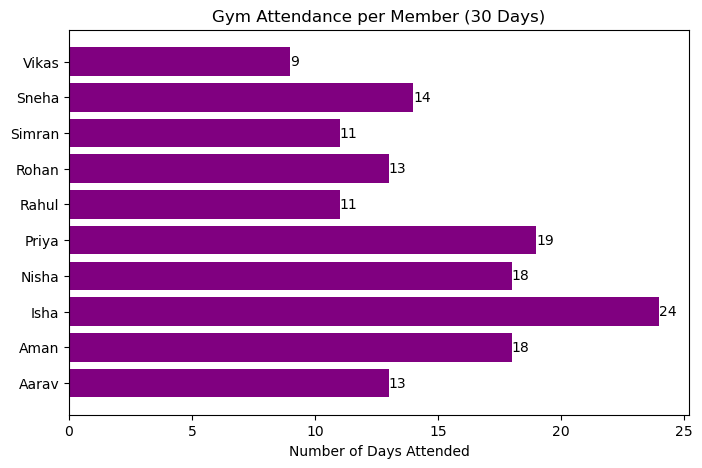

In [58]:
plt.figure(figsize=(8,5))
bars = plt.barh(attendance.index, attendance.values,color='purple' )

for i in range(len(attendance)):
    plt.text(attendance.values[i], i, 
             attendance.values[i], 
             va='center')

plt.xlabel("Number of Days Attended")
plt.title("Gym Attendance per Member (30 Days)")

plt.show()

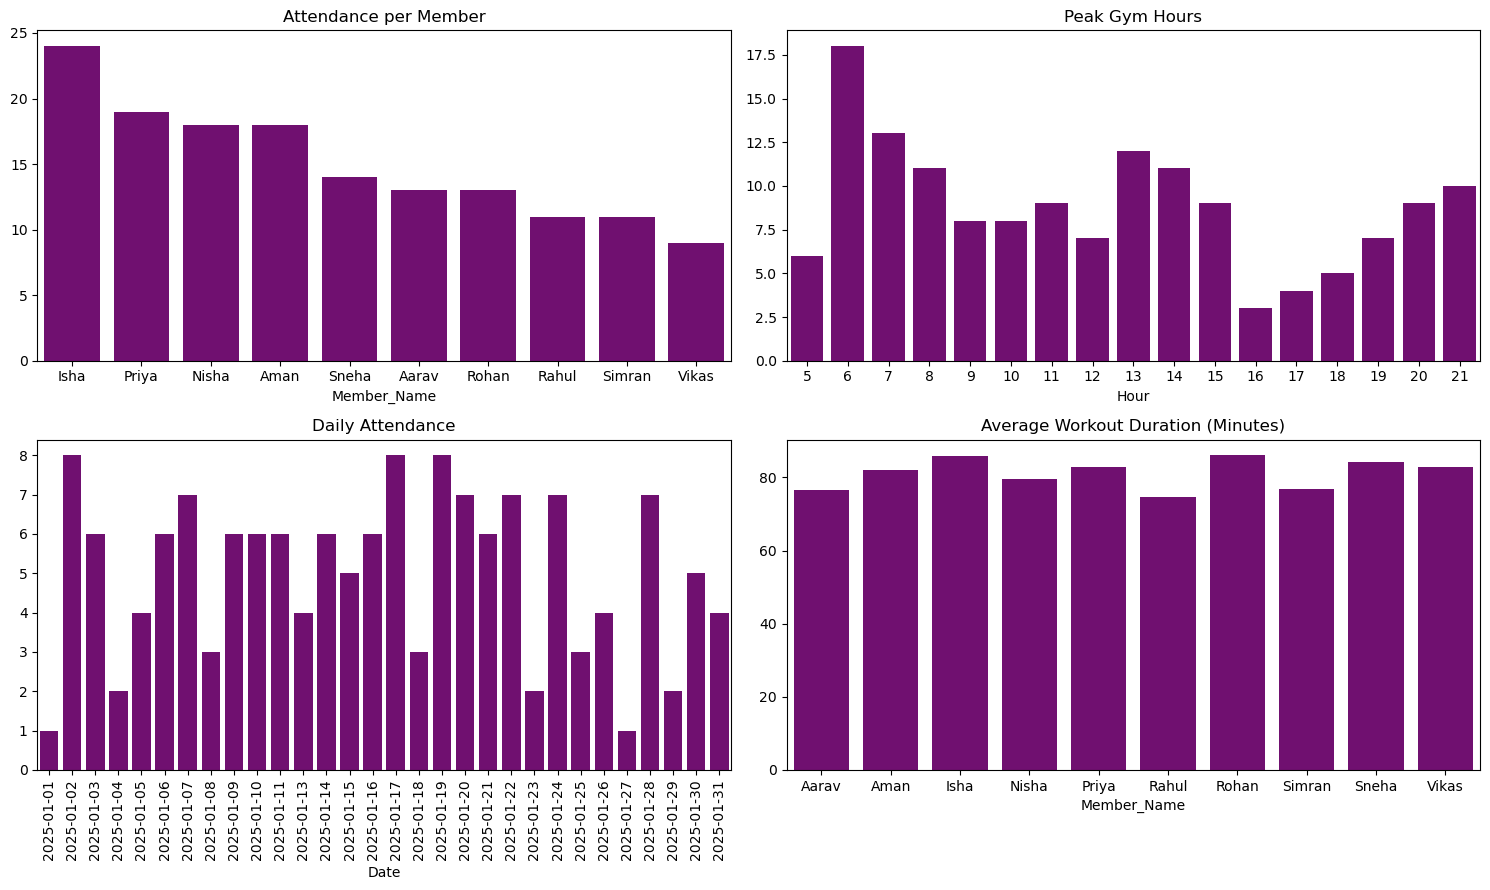

In [75]:
fig = plt.figure(figsize=[15,9])

fig.add_subplot(221)
a = df.groupby("Member_Name").size().sort_values(ascending=False)
sb.barplot(x=a.index, y=a.values, color="purple")
plt.title("Attendance per Member")
plt.xticks(rotation=0)

fig.add_subplot(222)
df["Hour"] = df["Entry_Time"].dt.hour
b = df.groupby("Hour").size()
sb.barplot(x=b.index, y=b.values, color="purple")
plt.title("Peak Gym Hours")
plt.xticks(rotation=0)

fig.add_subplot(223)
c = df.groupby("Date").size()
sb.barplot(x=c.index, y=c.values, color="purple")
plt.title("Daily Attendance")
plt.xticks(rotation=90)

fig.add_subplot(224)
df["Duration"] = (df["Exit_Time"] - df["Entry_Time"]).dt.total_seconds()/60
d = df.groupby("Member_Name")["Duration"].mean()
sb.barplot(x=d.index, y=d.values, color="purple")
plt.title("Average Workout Duration (Minutes)")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [64]:
total_days = df.Date.nunique()
attendance = df.groupby("Member_Name").size()
attendance_percent = (attendance / total_days) * 100
attendance_percent = attendance_percent.sort_values(ascending=False)
attendance_percent

Member_Name
Isha      80.000000
Priya     63.333333
Nisha     60.000000
Aman      60.000000
Sneha     46.666667
Aarav     43.333333
Rohan     43.333333
Rahul     36.666667
Simran    36.666667
Vikas     30.000000
dtype: float64

In [65]:
attendance_percent[attendance_percent > 70]

Member_Name
Isha    80.0
dtype: float64

In [68]:
df["Day"] = df["Date"].dt.day_name()

df.groupby("Day").size().sort_values(ascending=False)

Day
Friday       31
Thursday     27
Tuesday      26
Wednesday    18
Monday       18
Sunday       16
Saturday     14
dtype: int64

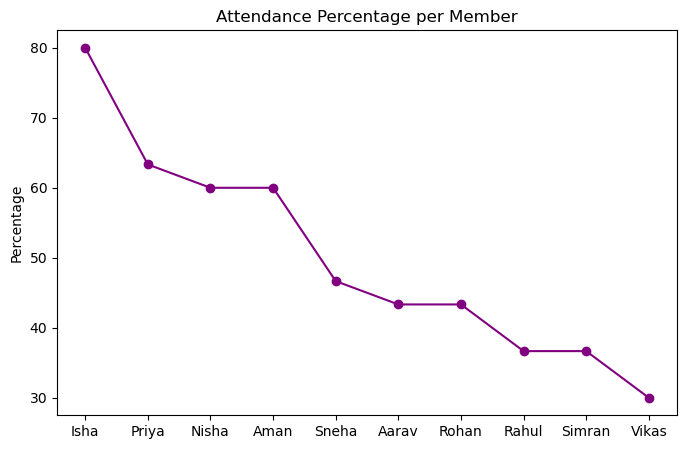

In [77]:

attendance_sorted = attendance_percent.sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.plot(attendance_sorted.index,
         attendance_sorted.values,
         marker='o',
         color="purple")

plt.xticks(rotation=0)
plt.title("Attendance Percentage per Member")
plt.ylabel("Percentage")
plt.show()